# Forecasting Stocks

```{image} img/portada.png
:alt: portada
:class: bg-primary mb-1
:width: 425px
:align: center
```

¿Te has planteado alguna vez invertir en el mercado de valores? Este juego te va a ayudar a tomar la decisión porque se trata, precisamente, de predecir la evolución del precio de la acción de empresas reales. El juego consiste en los siguiente:

1. El jugador empieza seleccionando la empresa con la que quiere jugar
2. A continuanción elige un nivel de dificultad que se va a traducir en la cantidad de días que tendrá que predecir. Cuanto más largo sea el plazo de predicción, más complicado.
3. Por último, el juego le muestra la evolución del percio de la acción seleccionada y el jugador tiene que dibujar sobre la gráfica la tendencia que ha previsto

La puntuación se calcula en función de cómo de acertado ha estado el jugador marcando los valores predichos respecto a los valores reales.

## Descarga de datos bursátiles

El primer paso es indicar el nombre de la empresa con la que vamos a jugar. Para acceder a su información bursatil, vamos a utilizar el paquete de Python **pandas_datareader**.

Por el momento jugaremos con el precio de la acción de **AMAZON** cuyo código es **AMXN**, pero el juego puede hacerse mucho más entretenido si contamos con una lista de empresas y el juego elige aleatoriamente una de ellas para cada jugador.

```{seealso}
[Aquí](https://pandas-datareader.readthedocs.io/en/latest/) puedes encontrar más información sobre la instalación y los métodos que importa la librería **pandas_datareader**.

Los códigos de las empresas los puedes obtener de la web de [Yahoo Finance](https://finance.yahoo.com/)
```

::::{warning}
En el momento de escribir este documento Yahoo ha cambiado las condiciones de su servicio por lo que el acceso a su API a través de la librería **pandas_datareader** no coincide exactamente con lo que aparece en su documentación. Por el momento te vamos a proporcionar un workaround funcional. Pero seguramente, cuando este libro llegue a tí, los desarrolladores de **pandas_datareader** ya hayan actualizado su documentación.

Este tipo de problemas son muy habituales en el mundo de la programación. Y esta no será la última vez que tendrás que pegarte con las librerías, sus versiones y los cambios en las condiciones del servicio.
::::

### Solución:

In [1]:
from pandas_datareader import data
import pandas as pd
import yfinance as yf
yf.pdr_override()

# Define the instruments to download. We would like to see Apple and Microsoft
tickers = ['AMZN']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2018-01-01'
end_date =   '2022-01-01'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
df = data.get_data_yahoo(tickers, start_date, end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000


::::{note}
La librería **pandas_datareader** nos da acceso a múltiples APIs de datos. En este caso estamos leyendo la información de *Yahoo Finance*, por eso la sintaxis de la llamada responde a esta instrucción:

:::{code}
df = data.get_data_yahoo(tickers, start_date, end_date)
:::

Vamos a revisar sus columnas y los índices de las filas:

In [2]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=1008, freq=None)

## Limpieza de datos

Para nuestro juego vamos a utilizar el precio de la acción al cierre del mercado. Para simplificar el *DataFrame*, tendrás que quedarte exclusivamente con el índice **Date** y la columna **Close**. Utiliza la sintaxis de **pandas** para generar una variable llamada **close** que sólo contenga el índice **Date** y la columna **Close**.

### Solución:

In [4]:
# Getting just the adjusted closing prices.
close = df['Close']
close.head()

Date
2018-01-02    59.450500
2018-01-03    60.209999
2018-01-04    60.479500
2018-01-05    61.457001
2018-01-08    62.343498
Name: Close, dtype: float64

::::{note}
Si notas que al invocar la función **head** el aspecto del dataframe ha cambiado, eso se debe a que nuestra variable **close** ya no es un *DataFrame* de Pandas, sino un objeto de tipo *Series*. Esto ocurre siempre que trabajamos con una sóla columna.
::::

In [5]:
type(close)

pandas.core.series.Series

Podemos convertir la variable **Close** en un *DataFrame*, pero no es necesario:

:::{code}
pd.DataFrame(close)
::::

## Visualización del precio de la acción

Antes de seguir programando el juego, deberíamos asegurarnos que los datos están bien descargados. Para ello, lo más sencillo, es hacer una visualización rápida.

Utiliza el paquete **pyplot** de la librería **matplotlib** para visualizar el precio de la acción a cierre del mercado, frente a la fecha. Coloca un título representativo a la figura y a sus ejes. Y asegúrate que las fechas se representan de manera correcta.

### Solución:

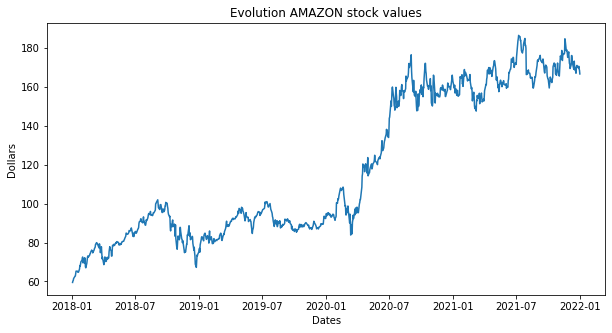

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(close)
plt.xlabel("Dates")
plt.ylabel("Dollars")
plt.title("Evolution AMAZON stock values")
plt.show()

Trabajar con **pandas** no sólo es cómodo desde el punto de vista del procesado de los datos, sino que también posée funciones que simplifican otras tareas, como por ejemplo, la visualización.

Puedes invocar directamente al comando **plot** desde una variable tipo DATAFRAME o SERIES de **pandas**.

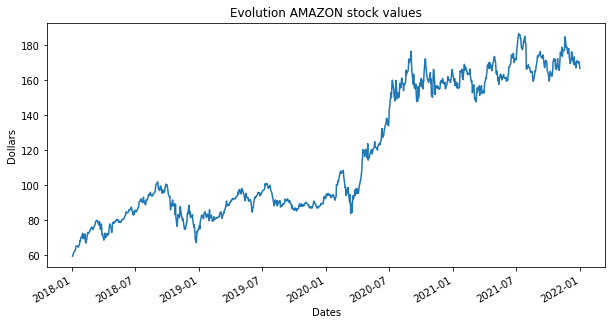

In [7]:
close.plot(kind='line', title="Evolution AMAZON stock values", 
           xlabel = "Dates",
           ylabel = "Dollars",
           figsize=(10,5))
plt.show()

Otra de la ventaja de trabajar con objetos de **pandas** es que dispone de funcionalidades específicas para series temporales. Como por ejemplo calcular medias móviles mediante la función **rolling**, medias de ventana expandida a través de **expanding** o medias de ventana ponderada con **ewm**.


```{seealso}
Puedes investigar sobre la sintaxis de estas funciones en estos enlaces: [rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html), [expanding](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html) y (ewm)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html]
```

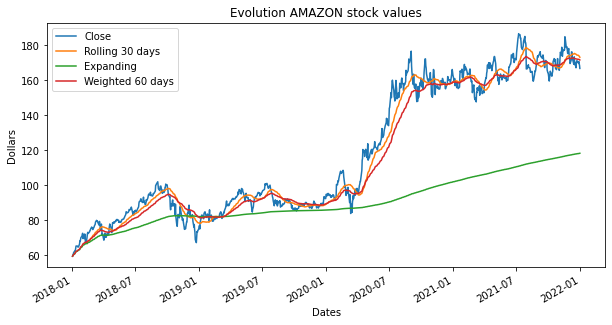

In [8]:
close.plot(kind='line', title="Evolution AMAZON stock values", figsize=(10,5),legend=True)
close.rolling(30).mean().plot(label= 'Rolling 30 days',legend=True)
close.expanding().mean().plot(label= 'Expanding',legend=True)
close.ewm(span=60).mean().plot(xlabel = "Dates",ylabel = "Dollars", label= 'Weighted 60 days',legend=True)
plt.show()

## Selección del nivel de dificultad

Predecir el precio de la acción de un día para otro puede ser relativamente facil si el sector de la empresa es estable. Pero predecir el precio de la acción a un mes vista es otra historia. Vamos a definir el nivel de dificultad de la siguiente manera:

* **Easy**. Predecir el precio de la acción al día siguiente. Para jugar en este nivel necesitaremos al menos un mes de información
* **Medium**. Predecir el precio de la acción durante el mes siguiente. Para jugar en este nivel necesitaremos varios meses de información
* **Hard**. Predecir el precio de la acción durante el año siguiente. Para jugar en este nivel necesitaremos varios años de información

El juego consiste en mostrar una gráfica con la evolución del precio de la acción permitiendo al usuario "pintar" sobre la gráfica la posible tendencia futura de ese valor.

Para ello necesitamos un código que realice la siguientes tareas:

1. En función del nivel de dificultad, mostrar una gráfica con 1 mes, 12 meses o varios años de la evolución del precio de la acción
2. La gráfica debe "esconder" la información del último día, el último mes o el último año que posteriormente se utilizará para validar la predicción del jugador

### Solución:

El primer paso es preguntar el nivel de difictultad. Para simplificar la respuesta hemos asignado un número a cada nivel.

In [9]:
print("Chose difficulty: ")
print("   - [1] Easy (1 day forecast)")
print("   - [2] Medium (1 month forecast)")
print("   - [3] Hard (1 year forecast)")
difficulty = int(input("Enter difficulty: "))

Chose difficulty: 
   - [1] Easy (1 day forecast)
   - [2] Medium (1 month forecast)
   - [3] Hard (1 year forecast)
Enter difficulty: 2


Una vez seleccionada la dificultad, tienes que filtrar la cantidad de fechas. Para el nivel fácil nos vamos a quedar con 30 días, para el nivel intermedio 365 y para el nivel más dificil preservaremos todo el histórico. Estos valores los almacenaremos en la variable **dates**. 

También en función del nivel de dificultad tendrás que esconder 1 día, 30 días o 365 días. Estos valores los utilizaremos para validar la predicción del jugador. Empieza construyendo un condicional para crear una variable **hide** de tipo INT que tomará diferentes valores dependiendo del nivel seleccionado.

In [10]:
if difficulty == 1:
    dates = close.index[-30:]
    hide = 1
elif difficulty ==2:
    dates=close.index[-365:]
    hide = 30
elif difficulty ==3:
    dates==close.index
    hide = 365
else:
    print("Unknown value")
    
print("Available days: {}".format(len(close.index)))
print("Playable days: {}".format(len(dates)))

Available days: 1008
Playable days: 365


:::{note}
Nota que en el código anterior jugaríamos con 365 días porque con anterioridad habíamos seleccionado un nivel de dificultad intermedio.            
:::

A continuación, tienes que filtrar los datos para que sólo contengan las fechas que hemos seleccionado. Esto puedes hacerlo con la función **loc** de **pandas**.

In [11]:
historical=close.loc[dates]
print("Historical data: {} days".format(len(historical)))

Historical data: 365 days


No olvides ocultar el rango de fechas que vamos a predecir. Para ello tienes que utilizar la variable **hide**.

In [12]:
historical.tail()

Date
2021-12-27    169.669495
2021-12-28    170.660995
2021-12-29    169.201004
2021-12-30    168.644501
2021-12-31    166.716995
Name: Close, dtype: float64

In [13]:
hidden_data=historical[:-hide]
hidden_data.tail()

Date
2021-11-11    173.625000
2021-11-12    176.257507
2021-11-15    177.283997
2021-11-16    177.035004
2021-11-17    177.449997
Name: Close, dtype: float64

## Realización de la predicción

La predicción queremos hacerla dibujando sobre la gráfica. Esto es posible en Python y en Jupyter Notebook con un poco de ayuda. En primer lugar tenemos que utilizar lo que Jupyter llama *magic commands* que dan funcionalidades extra a los notebooks. En este caso, vamos a invocar el siguiente comando:

:::{code}
%matplotlib notebook
:::

Este comando permite representar las mismas visualaciones pero en una ventana mucho más potente con algunas acciones adicionales como hacer scroll, zoom o clickar en la propia imagen.

También necesitamos almacenar las posiciones de aquellos puntos en los que vayamos a clickar. Para esto necesitamos la librería **mpl_point_clicker**.

```{seealso}
Puedes encontrar más información sobre la instalación de la librería **mpl_point_clicker** y ejemplos de utilización [aquí](https://mpl-point-clicker.readthedocs.io/en/latest/)
```

::::{tip}
La función **clicker** importada desde la librería **mpl_point_clicker** te va a permitir capturar los clicks del jugador al mismo tiempo que va dibujas una linea para facitar su seguimiento.

:::{code}
klicker = clicker(ax, ["Predicción"], markers=["x"], **{"linestyle": ":"})
:::
::::         

### Solución:

<IPython.core.display.Javascript object>


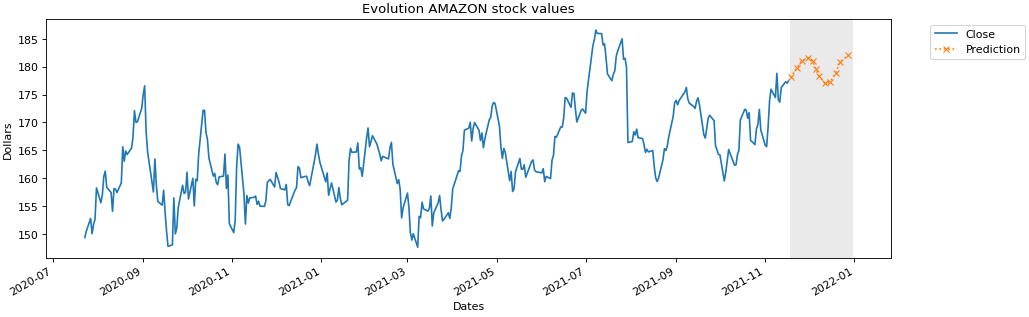

In [41]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_point_clicker import clicker

fig, ax = plt.subplots(constrained_layout=True)
hidden_data.plot(kind='line', title="Evolution AMAZON stock values", 
           xlabel = "Dates",
           ylabel = "Dollars",
           figsize=(13,4),
           ax=ax)
plt.axvspan(dates[-hide], dates[len(dates)-1], facecolor='0.2', alpha=0.1)
klicker = clicker(ax, ["Prediction"], markers=["x"], **{"linestyle": ":"})
plt.show()

::::{note}
Seguimos haciendo uso de la función plot de **pandas**, pero hemos introducido el parámetro **ax** para poder disponer de una mayor capacidad de personalización de las propiedades gráficas.

Tambien hemos utilizado la función **plt.axvspan** que nos permite colorear el fondo de la figura y así poder resaltar mejor la zona en la que realizar la predicción.
:::::

Una vez capturados los puntos, podemos deshabilitar el efecto del *magic command* con la siguiente instrucción que devuelve a las visualizaciones realizadas en jupyter el aspecto original.

In [42]:
%matplotlib inline

En el siguiente GIF podemos apreciar el efecto de hacer una predicción sobre los datos:

![prediccion.gif](img/prediccion.gif)

Una vez realizada la predicción podemos acceder a las coordenadas de la curva naraja.

In [43]:
print(klicker.get_positions())
x = klicker.get_positions()["Prediction"][:,0]
y = klicker.get_positions()["Prediction"][:,1]

{'Prediction': array([[18949.34740493,   178.05912833],
       [18953.8678076 ,   179.83593644],
       [18956.88140938,   181.02047518],
       [18961.40181205,   181.61274455],
       [18964.41541383,   181.02047518],
       [18966.67561517,   179.63851332],
       [18968.93581651,   178.25655145],
       [18972.70281873,   177.07201271],
       [18976.46982096,   177.26943583],
       [18980.23682319,   178.84882082],
       [18983.25042497,   180.82305206],
       [18988.52422809,   182.0075908 ]])}


::::{note}
Fíjate que a pesar de haber haber realizado la predicción en una gráfico cuyo eje X son fechas, la función **get_positions()** nos devuelve unos valores numéricos. Esto tiene que ver con la correspondencia del tipo de datos que usa **pandas** para las fechas y su conversión a segundos.

Si queremos ver la fecha con la que se corresponde uno de esos valores tenemos que utilizar el siguiente código:

:::{code}
import matplotlib

matplotlib.dates.num2date(x[0]).strftime('%Y-%m-%d %H:%M:%S')
:::

Si por el contrario queremos ver el valor numérico con el que se corresponde una determinada fecha, podemos utilizar la conversión dual:

:::{code}
import matplotlib

matplotlib.dates.date2num(fechas[-1])
:::
::::

Una vez que tenemos las coordenadas de la predicción del jugador, podemos representar los valores reales del intervalo oculto y los valores predichos.

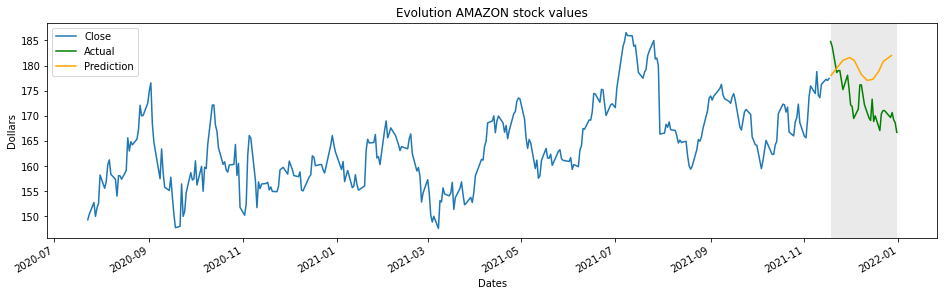

In [44]:
fig, ax = plt.subplots(constrained_layout=True)
hidden_data.plot(kind='line', title="Evolution AMAZON stock values", 
           xlabel = "Dates",
           ylabel = "Dollars",
           figsize=(13,4),
           ax=ax)
plt.axvspan(dates[-hide], dates[len(dates)-1], facecolor='0.2', alpha=0.1)
plt.plot(historical[-hide:], label="Actual", color="g")
plt.plot(x,y, label="Prediction", color="orange")
plt.legend()
plt.show()

Como ves, la predicción de valores vursátiles no es lo nuestro. 

## Cálcular la puntuación

Este apartado es, posiblemente, el más complicado. Tenemos que idear una manera de medir como de buena ha sido la predicción del jugador en relación a los valores reales.

Conceptualmente es sencillo, podríamos ir cogiendo cada una de las predicciones del jugador y calcular la diferencia respecto de los valores reales de ese día. Sin embargo, el jugador puede haber hecho click sólo 5 veces en un intervalo de 30 días. Además, puede haber hecho click en cualquier intanste entre dos días consecutivos para los que no tenemos lectura. 

La solución pasa por interpolar. Interpolar es estimar el valor intermedio entre dos valores conocidos. Existen muchas técnicas de interpolación. En este caso, vamos a utilizar una interpolación basada en [B-spline](https://en.wikipedia.org/wiki/B-spline).

Pero no sólo tendremos que interpolar los clicks del jugador, sino también los valores bursátiles reales para poder calcular la diferencia de predicción en muchos puntos.

```{seealso}
Puedes encontrar más información sobre las función de interpolación **splrep** y **splev** de la librería **scipy** [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html) y [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html).
```

### Solución:

Vamos a empezar interpolando los clicks del jugador. Para ello invocaremos a la funcion **splrep** para calcular el modelo y a la función **splev** para evaluarlo. La evaluación la vamos a hacer diariamente en todo el intervalo que habíamos ocultado. 

In [45]:
from scipy import interpolate
import matplotlib
import numpy as np

tck = interpolate.splrep(x, y, s=0.25)
dates_start = dates[-hide]
dates_end = dates[-1]
                                        
x_new = np.arange(matplotlib.dates.date2num(dates_start), matplotlib.dates.date2num(dates_end)+1, 1)
y_new = interpolate.splev(x_new, tck, der=0)

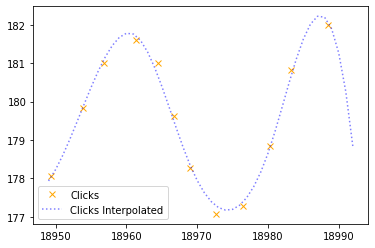

In [46]:
plt.plot(x,y,"x", color="orange", label="Clicks")
plt.plot(x_new,y_new, ":", color="blue", alpha=0.5, label="Clicks Interpolated")
plt.legend()
plt.show()

Si contamos el número de puntos que tiene la predicción interpolada obtenemos:

In [47]:
len(y_new)

44

Que no coincide con el número de puntos que tienen los datos reales, debido precisamente, a que no hay valores los fines de semana y otros festivos:

In [48]:
len(historical[-hide:])

30

Para resolverlo vamos a amplicar otra interpolación a los datos reales. Para que la interpolación funcione, tenemos que convertir el eje con fechas en un eje numérico. Para aprovechar el espacio vamos a utilizar una *comprehension list*.

In [49]:
from scipy import interpolate
import matplotlib

x=[matplotlib.dates.date2num(d) for d in list(historical[dates[-hide:]].index)]
y=historical[dates[-hide:]].values
tck = interpolate.splrep(x, y, s=0.25)

x_real = np.arange(matplotlib.dates.date2num(dates_start), matplotlib.dates.date2num(dates_end)+1, 1)
y_real = interpolate.splev(x_real, tck, der=0)

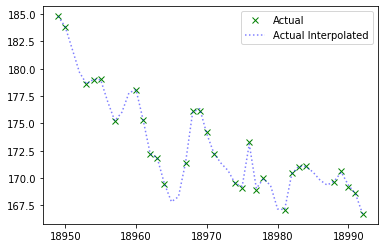

In [50]:
plt.plot(x,y,"x", color="green", label="Actual")
plt.plot(x_real,y_real, ":", color="blue", alpha=0.5, label="Actual Interpolated")
plt.legend()
plt.show()

Vamos a representar las dos curvas interpoladas para comprobar que el resultado es prácticamente idéntico al original

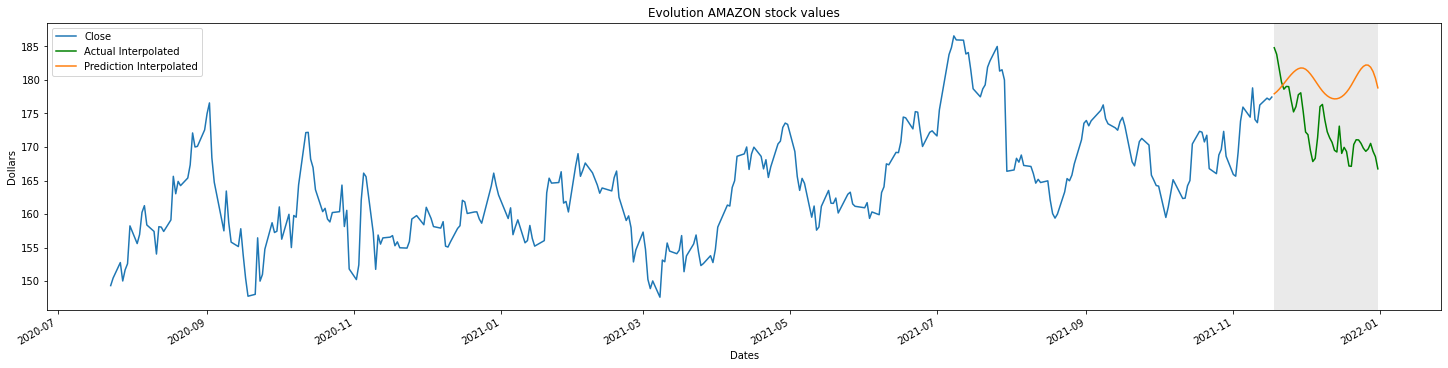

In [51]:
%matplotlib inline
fig, ax = plt.subplots(constrained_layout=True)
hidden_data.plot(kind='line', title="Evolution AMAZON stock values", 
           xlabel = "Dates",
           ylabel = "Dollars",
           figsize=(20,5),
             ax=ax)
plt.axvspan(dates[-hide], dates[len(dates)-1], facecolor='0.2', alpha=0.1)
plt.plot(x_real,y_real, label="Actual Interpolated", color="g")
plt.plot(x_new,y_new, label="Prediction Interpolated")
plt.legend()
plt.show()

Ahora sí podemos calcular la diferencia entre ambas curvas ya que ambas tienen el mismo número de puntos. Para visualizarlo mejor, vamos a utilizar la función **fill_between** de matplotlib que invocaremos desde el objeto **ax**.

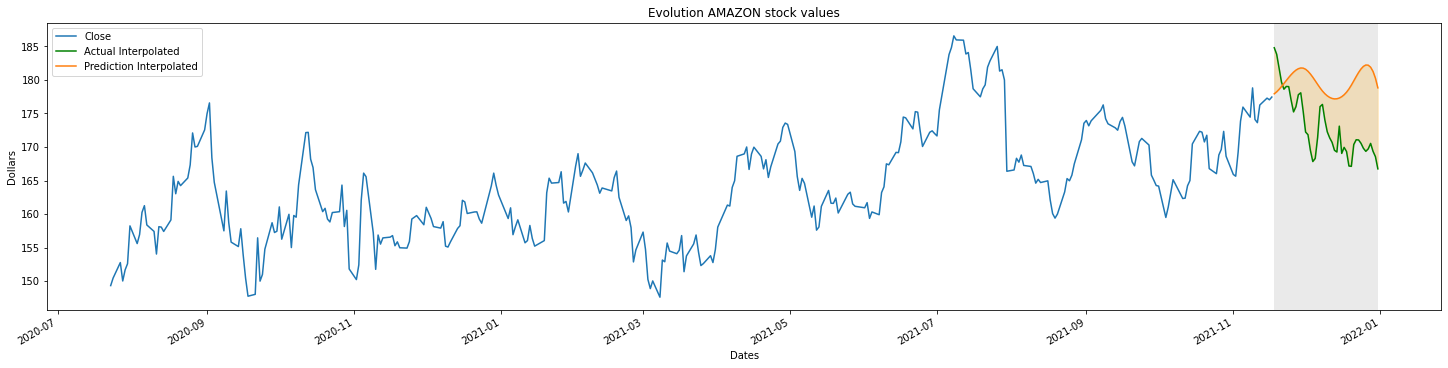

In [52]:
%matplotlib inline
fig, ax = plt.subplots(constrained_layout=True)
hidden_data.plot(kind='line', title="Evolution AMAZON stock values", 
           xlabel = "Dates",
           ylabel = "Dollars",
           figsize=(20,5),
             ax=ax)
plt.axvspan(dates[-hide], dates[len(dates)-1], facecolor='0.2', alpha=0.1)
plt.plot(x_real,y_real, label="Actual Interpolated", color="g")
plt.plot(x_new,y_new, label="Prediction Interpolated")
ax.fill_between(x_new, y_real, y_new, color="orange", alpha=0.2)
plt.legend()
plt.show()

Cuanto mayor sea el area anarajanda peor habrá sido la predicción. Puedes obtener un valor numérico de la bondad de la predicción realizada por el jugador restando punto a punto cada uno de los valores interpolados entre la curva real y la curva generada por los clicks del usuario. Cuanto menor sea el valor de la variable **score** mejor habrá sido la predicción.

In [53]:
score=sum(abs(y_real-y_new))
print("The score of the prediction is {}".format(score))

The score of the prediction is 330.77263682114125


```{warning}
Recuerda que para calcular el **score** tienes que utilizar el valor absoluto de la diferencia para evitar que una situación en la que la mitad de los valores predichos esté por encima de los valores reales y la otra mitad esté por debajo compense los errores resultando en puntuaciones cercanas al cero.
```  

## Extensiones del Juego

El código realizado en este capítulo está centrado en un único jugador. También lo hemos programado centrándonos en la predicción mensual (dificultad 2). A continuación te proponemos algunas ideas para seguir practicando y conseguir un juego más entretenido:

* Revisa el funcionamiento del código para la predicción diara (dificultad 1). Probablemente tendrás que pensar en una manera más sencilla de proporcionar un valor para la predicción diaria ya que será complicado hacer un único click en el día de la predicción.
* Revisa el funcionamiento del código para la predicción anual (dificultad 3). Probablemente tendrás que modificar ligeramente la visualización.
* En lugar de jugar siempre con la misma empresa, puedes definir una lista con los códigos de diferentes compañías de manera que el juego seleccione aleatoriamente una de ellas. El nivel de dificultad también podria elegirse aleatoriamente.
* Pensando en una partida multi-jugador, el código podría proponer un determinado número de desafíos a cada jugador, con dificultades y empresas aleatorias, calculando una puntuación final para cada uno de ellos.